# #7 beta_regression analysis

In this Jupyter Notebook, we compute the beta of stocks:

1. compare beta computed daily vs. monthly
2.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# msft vs. market rerurns - daily
msft = yf.download('MSFT', start='2010-01-01', end='2020-01-31')['Adj Close']
sp500 = yf.download('^GSPC', start='2010-01-01', end='2020-01-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
msft

Date
2010-01-04     23.572365
2010-01-05     23.579988
2010-01-06     23.435274
2010-01-07     23.191555
2010-01-08     23.351496
                 ...    
2020-01-24    159.698990
2020-01-27    157.028336
2020-01-28    160.105408
2020-01-29    162.601898
2020-01-30    167.188522
Name: Adj Close, Length: 2536, dtype: float64

In [3]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2020-01-24,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3708780000
2020-01-27,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883,3831050000
2020-01-28,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990,3531570000


In [4]:
sp500 = sp500['Adj Close']

In [5]:
df = pd.concat([msft, sp500], axis=1)
df

,Adj Close,Adj Close
Date,,
2010-01-04,23.572365,1132.989990
2010-01-05,23.579988,1136.520020
2010-01-06,23.435274,1137.140015
2010-01-07,23.191555,1141.689941
2010-01-08,23.351496,1144.979980
...,...,...
2020-01-24,159.698990,3295.469971
2020-01-27,157.028336,3243.629883
2020-01-28,160.105408,3276.239990


In [6]:
df.columns = ['MSFT', 'SP500']
df.dropna()
df

,MSFT,SP500
Date,,
2010-01-04,23.572365,1132.989990
2010-01-05,23.579988,1136.520020
2010-01-06,23.435274,1137.140015
2010-01-07,23.191555,1141.689941
2010-01-08,23.351496,1144.979980
...,...,...
2020-01-24,159.698990,3295.469971
2020-01-27,157.028336,3243.629883
2020-01-28,160.105408,3276.239990


In [7]:
ret = df.pct_change() * 100
ret.head()

,MSFT,SP500
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.032342,0.311568
2010-01-06,-0.613717,0.054552
2010-01-07,-1.039967,0.400120
2010-01-08,0.689651,0.288173


In [8]:
ret = ret.dropna()
ret.head()

,MSFT,SP500
Date,,
2010-01-05,0.032342,0.311568
2010-01-06,-0.613717,0.054552
2010-01-07,-1.039967,0.400120
2010-01-08,0.689651,0.288173
2010-01-11,-1.271993,0.174676


In [21]:
# mean (daily) return of the market
r_m = ret['SP500'].mean()
print(r_m)

0.0463009081140945


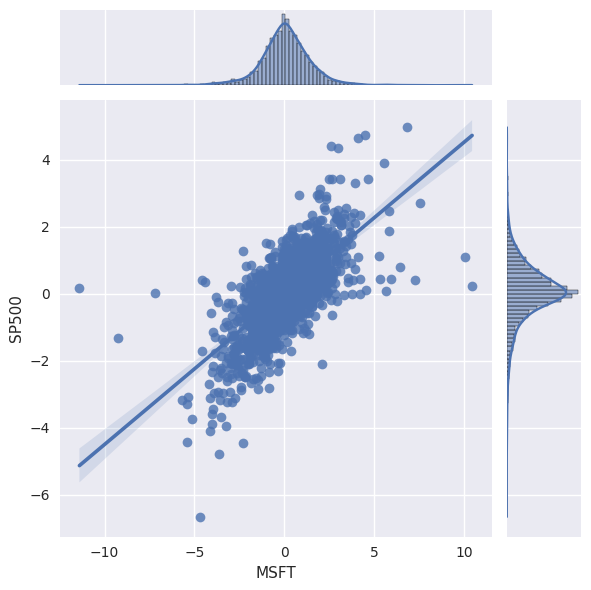

In [13]:
# visualizing the correlation btwn MSFT vs. SP500
import seaborn as sns
import matplotlib.pyplot as plt

with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='SP500', data=ret, kind='reg')
    # plt.xlabel('MSFT')
    # plt.ylabel('S&P500')
    # plt.title('Joint plot MSFT VS. SP500')
    # plt.show()

well, there seems to be some `weak` linear relationship between the two returns.

Via linear regression, we see this relationship clearly:

In [19]:
from statsmodels.formula.api import ols
model = ols("MSFT ~ SP500", data=ret).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2364.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:29:07   Log-Likelihood:                -3668.0
No. Observations:                2535   AIC:                             7340.
Df Residuals:                    2533   BIC:                             7352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0380      0.020      1.855      0.064      -0.002       0.078
SP500          1.0707      0.022     48.624      0.000       1.027       1.114
==============================================================================
Omnibus:                      605.310   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30578.035
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                      20.011   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the summary, CAPM suggests:
\begin{align*}
    r_{MSFT} &= \alpha + \beta * (r_{market} - r_f) \\
             &= 0.0380 + 1.0707 * (0.0463 - )
\end{align*}

Here $r_{market} = r_{SP500}$.

p-value for beta(SP500) is almost 0 ($< 0.05$), hence is `statistically significant`.(통계적 유의성)<br>
But the p-value for $\alpha$ is 0.064, which implies this alpha value is not statistically significant.

Meanwhile R-squared value is about 0.483: so about 48.3% of the change in $r_{MSFT}$ is explained by the change of $r_{market}$.

recall the dataset covers: from '2010-01-01' to '2020-01-31'

How about the beta ( & alpha) computed via monthly returns?

In [ ]:
import statsmodels.api as smf

model = smf.formula.ols(formula="MSFT ~ SP500", data=ret).fit()

print(model.params)

In [ ]:
import statsmodels.api as sm
model = sm.OLS(ret['MSFT'], sm.add_constant(ret['SP500'])).fit()

model.summary()

In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 다운로드
start_date = '2010-01-01'
end_date = '2020-01-31'
data = yf.download(['MSFT', '^GSPC'], start=start_date, end=end_date)['Adj Close']

# Jointplot으로 두 변수 간의 관계 시각화
with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='^GSPC', data=data, kind='reg')
    plt.xlabel('MSFT')
    plt.ylabel('^GSPC')
    plt.title('Scatter plot of MSFT and ^GSPC')
    plt.show()

# CAPM 모델을 위한 선형 회귀
X = sm.add_constant(data['^GSPC'])  # 상수항을 추가한 설명 변수 X
y = data['MSFT']  # 종속 변수 y

model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 피팅

# 회귀 결과 출력
print(results.summary())

In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 다운로드
start_date = '2010-01-01'
end_date = '2020-01-31'
data = yf.download(['MSFT', '^GSPC'], start=start_date, end=end_date)['Adj Close']

# Jointplot으로 두 변수 간의 관계 시각화
sns.set(style='whitegrid')  # 스타일 설정
sns.jointplot(x='MSFT', y='^GSPC', data=data, kind='reg')
plt.xlabel('MSFT')
plt.ylabel('^GSPC')
plt.title('MSFT와 ^GSPC의 산점도')
plt.show()

# CAPM 모델을 위한 선형 회귀
X = sm.add_constant(data['^GSPC'])  # 상수항을 추가한 설명 변수 X
y = data['MSFT']  # 종속 변수 y

model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 피팅

# 회귀 결과 출력
print(results.summary())


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression

# symbols = [stock, market]
# start date for historical prices
symbols = ['AXP', 'SPY']
data = yf.download(symbols, '2020-2-22')['Adj Close']

# Convert historical stock prices to daily percent change
price_change = data.pct_change()

# Deletes row one containing the NaN
df = price_change.drop(price_change.index[0])

# Create arrays for x and y variables in the regression model
# Set up the model and define the type of regression
x = np.array(df['AXP']).reshape((-1,1))
y = np.array(df['SPY'])
model = LinearRegression().fit(x, y)

print('Beta = ', model.coef_)

In [ ]:
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression

tickers = ['AAPL', 'MSFT', 'NVDA', 'AMD', '^GSPC']
data = yf.download(tickers, start='2015-12-01', end='2021-01-01', interval='1mo')['Adj Close']
# pxclose = yf.download(ticker, start='1980-01-01', end='2019-06-30', interval='1m')['Adj Close']
log_returns = np.log(data / data.shift())

data.head()

In [ ]:
log_returns = log_returns.dropna()
log_returns.head()

In [ ]:
cov = log_returns.cov()
var = log_returns['^GSPC'].var()

cov

In [ ]:
var

In [ ]:
# definition of beta of 'AAPL'
cov.loc['AAPL', '^GSPC'] / var

In [ ]:
x = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1, 1)
y = log_returns['AAPL'].iloc[1:].to_numpy().reshape(-1, 1)

lin_regr = LinearRegression()
lin_regr.fit(x, y)

lin_regr,coef_[0,0]